In [1]:
# load packages
import numpy as np
import pandas as pd
import random
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Part 1: Logistic Regression Classifier

In this section, you will get some practice working with regularisation and hyperparameter tuning in prediction models. You will use a python DIGITS dataset to complete this homework. 

In [21]:
#loading the DIGITS dataset
digits = load_digits()

#training the dataset –– I choose to build the array of c_values from 10^-5 to 10^5 
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.20, random_state=0)
c_vals = np.array([0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0])
skf = StratifiedKFold(n_splits=10)
split_indices = skf.split(x_train, y_train)
test_l1 = []
test_l2 = []
i = 0

In [22]:
#textual representation of the improvements on the test data
for train_index, test_index in split_indices:
    print("~~~~~~~~~~~~C=" + str(c_vals[i]) + '~~~~~~~~~~~~')
    LogRegL1 = LogisticRegression(penalty='l1', C=c_vals[i])
    LogRegL1.fit(x_train[train_index], y_train[train_index])
    train_acc_l1 = LogRegL1.score(x_train[train_index], y_train[train_index])
    test_acc_l1 = LogRegL1.score(x_train[test_index], y_train[test_index])
    test_l1.append(test_acc_l1)
    print("Logistic Regression L1 Train Accuracy: ", train_acc_l1)
    print("Logistic Regression L1 Test Accuracy: ", test_acc_l1)
    print("Confusion Matrix for Train: \n", confusion_matrix(y_train, LogRegL1.predict(x_train)))
    print("Confusion Matrix for Test: \n", confusion_matrix(y_test, LogRegL1.predict(x_test)))

    LogRegL2 = LogisticRegression(penalty='l2', C=c_vals[i])
    LogRegL2.fit(x_train[train_index], y_train[train_index])
    train_acc_l2 = LogRegL2.score(x_train[train_index], y_train[train_index])
    test_acc_l2 = LogRegL2.score(x_train[test_index], y_train[test_index])
    test_l2.append(test_acc_l2)
    print("Logistic Regression L2 Train Accuracy: ", train_acc_l2)
    print("Logistic Regression L2 Test Accuracy: ", test_acc_l2)
    print("Confusion Matrix for Train: \n", confusion_matrix(y_train, LogRegL2.predict(x_train)))
    print("Confusion Matrix for Test: \n", confusion_matrix(y_test, LogRegL2.predict(x_test)))
    
    i += 1

~~~~~~~~~~~~C=1e-05~~~~~~~~~~~~
Logistic Regression L1 Train Accuracy:  0.1048136645962733
Logistic Regression L1 Test Accuracy:  0.10738255033557047
Confusion Matrix for Train: 
 [[151   0   0   0   0   0   0   0   0   0]
 [147   0   0   0   0   0   0   0   0   0]
 [141   0   0   0   0   0   0   0   0   0]
 [154   0   0   0   0   0   0   0   0   0]
 [151   0   0   0   0   0   0   0   0   0]
 [142   0   0   0   0   0   0   0   0   0]
 [137   0   0   0   0   0   0   0   0   0]
 [140   0   0   0   0   0   0   0   0   0]
 [135   0   0   0   0   0   0   0   0   0]
 [139   0   0   0   0   0   0   0   0   0]]
Confusion Matrix for Test: 
 [[27  0  0  0  0  0  0  0  0  0]
 [35  0  0  0  0  0  0  0  0  0]
 [36  0  0  0  0  0  0  0  0  0]
 [29  0  0  0  0  0  0  0  0  0]
 [30  0  0  0  0  0  0  0  0  0]
 [40  0  0  0  0  0  0  0  0  0]
 [44  0  0  0  0  0  0  0  0  0]
 [39  0  0  0  0  0  0  0  0  0]
 [39  0  0  0  0  0  0  0  0  0]
 [41  0  0  0  0  0  0  0  0  0]]
Logistic Regression L2 Train 

Logistic Regression L2 Train Accuracy:  0.9899458623356535
Logistic Regression L2 Test Accuracy:  0.9791666666666666
Confusion Matrix for Train: 
 [[151   0   0   0   0   0   0   0   0   0]
 [  0 145   0   1   0   0   0   0   0   1]
 [  0   0 141   0   0   0   0   0   0   0]
 [  0   0   0 153   0   0   0   0   1   0]
 [  0   0   0   0 150   0   0   0   1   0]
 [  0   0   0   0   0 142   0   0   0   0]
 [  0   0   0   0   0   0 136   0   1   0]
 [  0   0   0   0   0   0   0 140   0   0]
 [  0   6   0   1   0   0   0   0 128   0]
 [  0   0   0   1   0   0   0   0   3 135]]
Confusion Matrix for Test: 
 [[27  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  1  0  2  0]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  1  0  0 38  0  0]
 [ 0  2  1  0  0  0  0  0 36  0]
 [ 0  0  0  0  0  1  0  0  2 38]]
~~~~~~~~~~~~C=1.0~~~~~~~~~~~~
Logistic Regression L1 Train Acc

Logistic Regression L1 Train Accuracy:  0.9992289899768697
Logistic Regression L1 Test Accuracy:  0.9071428571428571
Confusion Matrix for Train: 
 [[151   0   0   0   0   0   0   0   0   0]
 [  0 145   0   0   0   0   0   0   2   0]
 [  0   0 141   0   0   0   0   0   0   0]
 [  0   0   1 150   0   1   0   1   1   0]
 [  0   1   0   0 149   0   0   0   0   1]
 [  0   0   0   1   0 140   0   0   0   1]
 [  0   0   0   0   0   0 137   0   0   0]
 [  0   0   0   0   0   0   0 139   0   1]
 [  0   2   0   0   0   0   0   0 132   1]
 [  0   0   0   0   0   0   0   0   0 139]]
Confusion Matrix for Test: 
 [[27  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  1  0  4  0]
 [ 0  1 31  3  0  0  0  0  0  1]
 [ 0  0  1 28  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 38  0  0  0  2]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  3  1  1  0  0  0  0 32  2]
 [ 0  0  0  1  0  1  0  0  1 38]]
Logistic Regression L2 Train Accuracy:  0.9992289899768697
Log

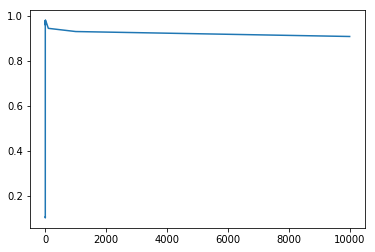

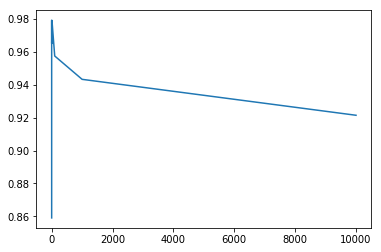

In [7]:
#visual representation on the 
plt.figure(1)
plt.plot(c_vals, test_l1)
plt.figure(2)
plt.plot(c_vals, test_l2)
plt.show()

# Part 2: Nueral Net

In [8]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [9]:
#define hyperparameters and input size
n_inputs = 8*8
n_hidden1 = 300
n_hidden2 = 200
n_hidden3 = 100

n_outputs = 10

In [10]:
#graph reset
tf.reset_default_graph()


In [11]:
#define placeholders for data in the formate of (inputs and targets)
X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = 'X')
y = tf.placeholder(tf.int64, shape = (None),name = 'y')

In [12]:
#define neuron layers (ReLU in hidden layers)
def neuron_layer(X, n_neurons, name, activation = None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        
        #initialize the weights to prevent vanishing/exploding gradients
        stddev = 2/np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        
        #initialize weights for the layer
        W = tf.Variable(init, name = "weights")
        #biases 
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        
        
        #output from every neuron
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z
        

In [13]:
#defining the hidden layers 
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name ="hidden1", activation = tf.nn.tanh)
    hidden2 = neuron_layer(X, n_hidden2, name= "hidden2", activation = tf.nn.tanh)
    hidden3 = neuron_layer(X, n_hidden3, name= "hidden3", activation = tf.nn.tanh)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")


In [14]:
#define loss function
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits)
    loss = tf.reduce_mean(xentropy, name = "loss")

In [15]:
#training step with Gradient Descent
learning_rate = 0.001
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [16]:
#evalution to show accuracy
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [18]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

n_epochs = 1000
batch_size = 100
n_batches = x_train.shape[0] // batch_size

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        shuffled_idx = np.random.permutation(x_train.shape[0])

        batch_xs = np.array_split(x_train[shuffled_idx], n_batches)
        batch_ys = np.array_split(y_train[shuffled_idx], n_batches)

        for batch_x, batch_y in zip(batch_xs, batch_ys):
            sess.run(training_op, feed_dict={X: batch_x, y: batch_y})
            
        
        acc_train = accuracy.eval(feed_dict={X: x_train, y: y_train})
        acc_val = accuracy.eval(feed_dict={X: x_test,
                                            y: y_test})
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./my_model_final.ckpt") # save model

0 Train accuracy: 0.13152401 Val accuracy: 0.094444446
1 Train accuracy: 0.144746 Val accuracy: 0.11111111
2 Train accuracy: 0.15031315 Val accuracy: 0.11388889
3 Train accuracy: 0.16283925 Val accuracy: 0.12222222
4 Train accuracy: 0.17675713 Val accuracy: 0.14166667
5 Train accuracy: 0.18719554 Val accuracy: 0.15277778
6 Train accuracy: 0.19972165 Val accuracy: 0.15555556
7 Train accuracy: 0.21851079 Val accuracy: 0.16111112
8 Train accuracy: 0.23799582 Val accuracy: 0.17777778
9 Train accuracy: 0.2512178 Val accuracy: 0.18888889
10 Train accuracy: 0.26304802 Val accuracy: 0.20277777
11 Train accuracy: 0.27279052 Val accuracy: 0.22222222
12 Train accuracy: 0.2915797 Val accuracy: 0.23333333
13 Train accuracy: 0.3020181 Val accuracy: 0.26944444
14 Train accuracy: 0.31871957 Val accuracy: 0.28055555
15 Train accuracy: 0.33542103 Val accuracy: 0.29722223
16 Train accuracy: 0.35490605 Val accuracy: 0.3
17 Train accuracy: 0.36673626 Val accuracy: 0.31111112
18 Train accuracy: 0.38204592 V

161 Train accuracy: 0.9262352 Val accuracy: 0.8833333
162 Train accuracy: 0.927627 Val accuracy: 0.8833333
163 Train accuracy: 0.9283229 Val accuracy: 0.8833333
164 Train accuracy: 0.9283229 Val accuracy: 0.8833333
165 Train accuracy: 0.9297147 Val accuracy: 0.8833333
166 Train accuracy: 0.9297147 Val accuracy: 0.8833333
167 Train accuracy: 0.93041056 Val accuracy: 0.8833333
168 Train accuracy: 0.9318024 Val accuracy: 0.8833333
169 Train accuracy: 0.93110645 Val accuracy: 0.8833333
170 Train accuracy: 0.9318024 Val accuracy: 0.8833333
171 Train accuracy: 0.9324983 Val accuracy: 0.8833333
172 Train accuracy: 0.9324983 Val accuracy: 0.8833333
173 Train accuracy: 0.93319416 Val accuracy: 0.88611114
174 Train accuracy: 0.93319416 Val accuracy: 0.88611114
175 Train accuracy: 0.9345859 Val accuracy: 0.88611114
176 Train accuracy: 0.9345859 Val accuracy: 0.88611114
177 Train accuracy: 0.9352818 Val accuracy: 0.88611114
178 Train accuracy: 0.9352818 Val accuracy: 0.88611114
179 Train accuracy:

316 Train accuracy: 0.97007656 Val accuracy: 0.9111111
317 Train accuracy: 0.97007656 Val accuracy: 0.9111111
318 Train accuracy: 0.97007656 Val accuracy: 0.9111111
319 Train accuracy: 0.97007656 Val accuracy: 0.9111111
320 Train accuracy: 0.97007656 Val accuracy: 0.9111111
321 Train accuracy: 0.9714683 Val accuracy: 0.9111111
322 Train accuracy: 0.9714683 Val accuracy: 0.9111111
323 Train accuracy: 0.9714683 Val accuracy: 0.9111111
324 Train accuracy: 0.9714683 Val accuracy: 0.9111111
325 Train accuracy: 0.9714683 Val accuracy: 0.9111111
326 Train accuracy: 0.9714683 Val accuracy: 0.9111111
327 Train accuracy: 0.9714683 Val accuracy: 0.9111111
328 Train accuracy: 0.9714683 Val accuracy: 0.90833336
329 Train accuracy: 0.9714683 Val accuracy: 0.90833336
330 Train accuracy: 0.9714683 Val accuracy: 0.90833336
331 Train accuracy: 0.9714683 Val accuracy: 0.90833336
332 Train accuracy: 0.9714683 Val accuracy: 0.9111111
333 Train accuracy: 0.9714683 Val accuracy: 0.9111111
334 Train accuracy:

469 Train accuracy: 0.9812108 Val accuracy: 0.93333334
470 Train accuracy: 0.9812108 Val accuracy: 0.93333334
471 Train accuracy: 0.9812108 Val accuracy: 0.93333334
472 Train accuracy: 0.9812108 Val accuracy: 0.93333334
473 Train accuracy: 0.9812108 Val accuracy: 0.93333334
474 Train accuracy: 0.9812108 Val accuracy: 0.93333334
475 Train accuracy: 0.9812108 Val accuracy: 0.93333334
476 Train accuracy: 0.9812108 Val accuracy: 0.93333334
477 Train accuracy: 0.9812108 Val accuracy: 0.93333334
478 Train accuracy: 0.9812108 Val accuracy: 0.93333334
479 Train accuracy: 0.9812108 Val accuracy: 0.93333334
480 Train accuracy: 0.9819068 Val accuracy: 0.93333334
481 Train accuracy: 0.9819068 Val accuracy: 0.93333334
482 Train accuracy: 0.9819068 Val accuracy: 0.93333334
483 Train accuracy: 0.9819068 Val accuracy: 0.93333334
484 Train accuracy: 0.9819068 Val accuracy: 0.93333334
485 Train accuracy: 0.9819068 Val accuracy: 0.93333334
486 Train accuracy: 0.9819068 Val accuracy: 0.93333334
487 Train 

625 Train accuracy: 0.9874739 Val accuracy: 0.9361111
626 Train accuracy: 0.9874739 Val accuracy: 0.9361111
627 Train accuracy: 0.9874739 Val accuracy: 0.9361111
628 Train accuracy: 0.9881698 Val accuracy: 0.9361111
629 Train accuracy: 0.9881698 Val accuracy: 0.9361111
630 Train accuracy: 0.9881698 Val accuracy: 0.9361111
631 Train accuracy: 0.9881698 Val accuracy: 0.9361111
632 Train accuracy: 0.9888657 Val accuracy: 0.9361111
633 Train accuracy: 0.9888657 Val accuracy: 0.9361111
634 Train accuracy: 0.9888657 Val accuracy: 0.9361111
635 Train accuracy: 0.9888657 Val accuracy: 0.9361111
636 Train accuracy: 0.9888657 Val accuracy: 0.9361111
637 Train accuracy: 0.9888657 Val accuracy: 0.9361111
638 Train accuracy: 0.9888657 Val accuracy: 0.9361111
639 Train accuracy: 0.9888657 Val accuracy: 0.9361111
640 Train accuracy: 0.9888657 Val accuracy: 0.9361111
641 Train accuracy: 0.9888657 Val accuracy: 0.9361111
642 Train accuracy: 0.9888657 Val accuracy: 0.9361111
643 Train accuracy: 0.988865

783 Train accuracy: 0.9937369 Val accuracy: 0.9444444
784 Train accuracy: 0.9937369 Val accuracy: 0.9444444
785 Train accuracy: 0.9937369 Val accuracy: 0.9444444
786 Train accuracy: 0.9937369 Val accuracy: 0.9444444
787 Train accuracy: 0.9937369 Val accuracy: 0.9444444
788 Train accuracy: 0.9937369 Val accuracy: 0.9444444
789 Train accuracy: 0.9937369 Val accuracy: 0.9444444
790 Train accuracy: 0.9937369 Val accuracy: 0.9444444
791 Train accuracy: 0.9937369 Val accuracy: 0.9444444
792 Train accuracy: 0.9937369 Val accuracy: 0.9444444
793 Train accuracy: 0.9937369 Val accuracy: 0.9444444
794 Train accuracy: 0.9937369 Val accuracy: 0.9444444
795 Train accuracy: 0.9937369 Val accuracy: 0.9444444
796 Train accuracy: 0.9937369 Val accuracy: 0.9444444
797 Train accuracy: 0.9937369 Val accuracy: 0.9444444
798 Train accuracy: 0.9937369 Val accuracy: 0.9444444
799 Train accuracy: 0.9937369 Val accuracy: 0.9444444
800 Train accuracy: 0.9937369 Val accuracy: 0.9444444
801 Train accuracy: 0.993736

931 Train accuracy: 0.99512875 Val accuracy: 0.94722223
932 Train accuracy: 0.99512875 Val accuracy: 0.94722223
933 Train accuracy: 0.99512875 Val accuracy: 0.94722223
934 Train accuracy: 0.99512875 Val accuracy: 0.94722223
935 Train accuracy: 0.99512875 Val accuracy: 0.94722223
936 Train accuracy: 0.99512875 Val accuracy: 0.94722223
937 Train accuracy: 0.99512875 Val accuracy: 0.94722223
938 Train accuracy: 0.99512875 Val accuracy: 0.94722223
939 Train accuracy: 0.99512875 Val accuracy: 0.94722223
940 Train accuracy: 0.99512875 Val accuracy: 0.94722223
941 Train accuracy: 0.99512875 Val accuracy: 0.94722223
942 Train accuracy: 0.99512875 Val accuracy: 0.94722223
943 Train accuracy: 0.99512875 Val accuracy: 0.94722223
944 Train accuracy: 0.99512875 Val accuracy: 0.94722223
945 Train accuracy: 0.99512875 Val accuracy: 0.94722223
946 Train accuracy: 0.99512875 Val accuracy: 0.94722223
947 Train accuracy: 0.99512875 Val accuracy: 0.94722223
948 Train accuracy: 0.99512875 Val accuracy: 0.9